# __Dynamic Response of a Multi-Story building with _`COMSOL Multiphysics`_ __

This TP is done by Chensheng Luo

As many data calculated by COMSOL is needed by this file, a precalculated file is availiable on my github account: https://github.com/lcs27/MecaStruc-CS/blob/main/BE3/mdof_comsol_Chensheng%20Luo.ipynb

## __Hands on__

GRAPHS WITHOUT LEGENDS AND UNITS WILL NOT BE CONSIDERED!!

<img style='width: 700px; margin: 0px; float: left; border: 0px solid black;' src="./images/comsol_building.png">

#### Setup

In [1]:
# Load fundamental modules
from math import sin
import numpy as np
import pandas as pd
from numpy.linalg import inv, norm
from scipy.linalg import eigh
from scipy.signal import find_peaks
from matplotlib import pyplot as plt

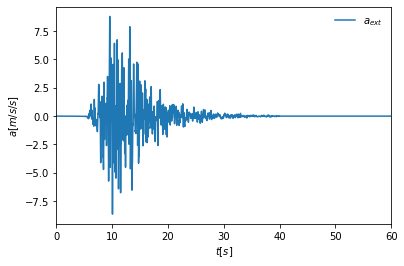

In [2]:
# Set up properties
dofs = 3 # number of dofs
Lx = 5 # Floor x-side [m]
Ly = 5 # Floor y-side [m]
ft = 0.3 # Floor thickness [m]

Hf = 3 # Floor's height [m]
bc = 0.3 # Cross sectional base for column elements [m]
hc = 0.3 # Cross sectional height for column elements [m]

E_floor = 25e9 # Floor concrete Young's modulus [Pa]
E_beam = 28.3e9 # Beam/Column concrete Young's modulus [Pa]

rho_floor = 2300 # Floor concrete unit mass density [kg/m^3]
rho_beam = 500 # Beam/Column concrete unit mass density [kg/m^3]

# time vector
dt = 1.0e-2 # time step
dur = 60.0 # duration
vtm = np.arange(0.0,dur,dt) # time vector
ntm = vtm.size # number of time steps

# Compute the transfer function using the Fast Fourier Transform (use np.fft.rfft - https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

# earthquake input acceleration (inertial force)  [time (s),acceleration (m/s/s)]
eqk = np.loadtxt("seisme.txt")
aeq = lambda s: np.interp(s,eqk[:,0],eqk[:,1])
plt.ion()
plt.plot(vtm,aeq(vtm),label=r"$a_{ext}$")
plt.xlim(0.0,dur)
plt.xlabel(r'$t [s]$')
plt.ylabel(r'$a [m/s/s]$')
plt.legend(frameon=False)
plt.ioff()
plt.show()

#### __[TASK #1] _`COMSOL Multiphysic`_ 3D Modal Shapes and Eigen-frequencies__ [1/20 points]

In the `Global Definitions`, select `Nx`=`Ny`=1 and `Nf`=3, with no missing frames
(`Mx`=`My`=`Mf`=0). 

Rebuild the `Geometry` by building all the entities (in `Form Union (fin)`)

* Compute the `Eigenfrequencies` study for 10 Eigen-frequencies (real) around 1 Hz and
report the corresponding `Modal Shapes` here (snapshots and frequency values to be placed in the cell Report the Modal Shapes Eigen-frequencies from _`COMSOL Multiphysics`_)

**Remark of Chensheng** With teacher's advice, we choose to allow rotation of column such that more interesting modes can be found.

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn1.png">

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn2.png">

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn3.png">

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn4.png">

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn5.png">

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn6.png">

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn7.png">

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn8.png">

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn9.png">

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn10.png">

* Evaluate and export `umx`, `umy` and `umz` from _`COMSOL Multiphysics`_ and plot them in the notebook. `umx`, `umy` and `umz` are the floor's midsurface displacements (one at each floor's corner) in the $x$, $y$ and $z$ direction.   
**N.B.By Chensheng Luo** To simplify, the file ```.mph``` of ```COMSOL``` is modified to get directly the real part of each value. 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38],
           dtype='int64')


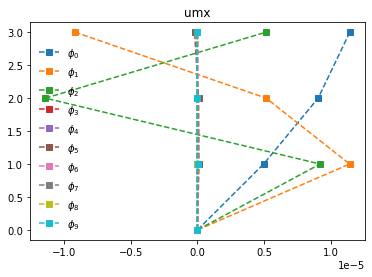

In [3]:
comsol_eigs3D = pd.read_csv("./comsol_results/with_rotation_eigen_modes_3D.csv", sep=",", header=None, comment='%')

print(comsol_eigs3D.columns)

umx=np.concatenate((np.zeros((1,10)),np.array(comsol_eigs3D.iloc[:,1:4]).T))
umy=np.concatenate((np.zeros((1,10)),np.array(comsol_eigs3D.iloc[:,14:17]).T))
umz=np.concatenate((np.zeros((1,10)),np.array(comsol_eigs3D.iloc[:,27:30]).T))
plt.ion()
for i in range(10):
    plt.plot(umx[:,i],np.array([0,1,2,3]),'--s',label=r'$\phi_{:>d}$'.format(i))

plt.legend(frameon=False)
plt.title('umx')
plt.ioff()

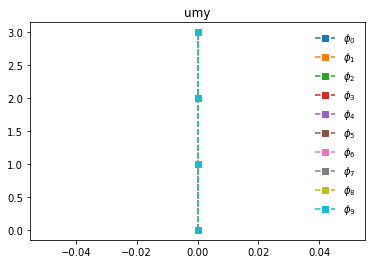

In [4]:
plt.ion()
for i in range(10):
    plt.plot(umy[:,i],np.array([0,1,2,3]),'--s',label=r'$\phi_{:>d}$'.format(i))

plt.legend(frameon=False)
plt.title('umy')
plt.ioff()

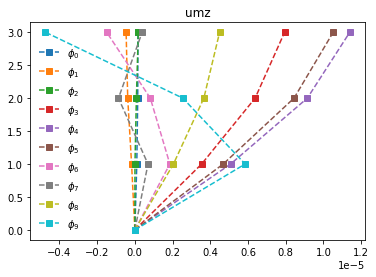

In [5]:
plt.ion()
for i in range(10):
    plt.plot(umz[:,i],np.array([0,1,2,3]),'--s',label=r'$\phi_{:>d}$'.format(i))

plt.legend(frameon=False)
plt.title('umz')
plt.ioff()

* Evaluate and export the Participation Factors $\Gamma_{ij}$ from _`COMSOL Multiphysics`_ (*Hint*: Export Group `Participation Factors (Eigenfrequencies)`).

*Nota bene*: Using modal participation factors is a way to characterize how much a certain mode will be excited by a rigid body acceleration $\boldsymbol{d}_j$ in a certain direction $j$. The _normalized participation factor_ with respect to mode $i$ and excitation direction $j$, is defined as:

$$\tilde{\Gamma}_{ij}=\frac{\left<\boldsymbol{\phi}_i,\boldsymbol{M}.\boldsymbol{d}_j\right>}{\left<\boldsymbol{\phi}_i,\boldsymbol{M}.\boldsymbol{\phi}_j\right>}=\frac{\Gamma_{ij}}{m_i}$$

with $\Gamma_{ij}=\left<\boldsymbol{\phi}_i,\boldsymbol{M}.\boldsymbol{d}_j\right>$ the Participation Factors and $m_i=\left<\boldsymbol{\phi}_i,\boldsymbol{M}.\boldsymbol{\phi}_j\right>$ the $i^{\text{th}}$ modal mass.

**N.B.By Chensheng Luo** To simplify, the file ```.mph``` of ```COMSOL``` is modified to get directly the real part of each value. 

In [6]:
comsol_Gamma3D = pd.read_csv("./comsol_results/with_rotation_participation_factors_3D.csv", sep=",", header=None, comment='%')
print(comsol_Gamma3D)
#print(np.real(comsol_Gamma3D))

           0             1             2             3             4   \
0    3.086673  1.072314e+05  1.992722e-05  1.260319e-10  2.219933e+02   
1    8.657742  3.076372e+04  4.390298e-05 -8.450512e-11  6.361054e+01   
2   12.526834  1.185982e+04  3.710057e-05  8.335087e-11  2.446334e+01   
3   29.003537 -1.432308e-10 -1.617874e-13  1.340740e+05 -2.355698e-13   
4   54.848252  1.707469e-11 -1.854971e-12  5.518819e+04  1.677806e-14   
5   59.181120 -8.558392e-12  3.824615e-12  2.113409e+04 -7.717531e-15   
6   90.991315 -3.322563e-11  4.318416e-12  3.049634e+04 -2.788482e-14   
7  124.201879  2.031843e-05  4.565170e-05 -1.010217e+02  1.640277e-08   
8  124.201893 -3.975090e-05 -8.107090e-05  6.238253e+00 -2.826928e-08   
9  124.230210 -1.387208e-05 -3.223440e-05 -1.362630e+02 -1.087259e-08   

             5             6             7              8             9   \
0  4.125387e-08  2.609145e-13     -0.000016   81740.408788  4.096534e-01   
1  9.077875e-08 -1.747323e-13      0.000377 

**REMARK by CHENSHENG** We ignore the commented part, which shows each column is (resp.)
- Eigenfrequency (Hz)
- Participation factor, X-translation (1)
- Participation factor, Y-translation (1)
- Participation factor, Z-translation (1)
- Participation factor, normalized, X-translation (1)
- Participation factor, normalized, Y-translation (1)
- Participation factor, normalized, z-translation (1)
- Participation factor, X-rotation (1)
- Participation factor, Y-rotation (1)
- Participation factor, Z-rotation (1)
- Participation factor, normalized, X-rotation (1)
- Participation factor, normalized, Y-rotation (1)
- Participation factor, normalized, Z-rotation (1)

* Evaluate and export the _effective modal masses_ $m_{\text{eff},ij}$ and compare them with the _`COMSOL Multiphysics`_ ones   

**N.B.By Chensheng Luo** To simplify, the file ```.mph``` of ```COMSOL``` is modified to get directly the real part of each value. 

*Nota bene*: in _`COMSOL Multiphysics`_  the `Effective Participation Mass (Eigenfrequencies)` are computed (in the `Export Group`). The _effective modal mass_ is a quantity related to the modal participation factor. The effective modal mass for mode $i$, with respect to excitation in direction $j$, is defined from the participation factor and the modal mass as:

$$m_{\text{eff},ij}=m_i\cdot \Gamma_{ij}^2$$

In [7]:
comsol_masses3D = pd.read_csv("./comsol_results/with_rotation_participation_masses_3D.csv", sep=",", header=None,comment='%')
print(np.real(comsol_masses3D))

[[3.04163851e+00 4.90204135e+04 1.59639210e-15 6.65428396e-12
  8.76283242e-14 6.74468937e-07 8.76283242e-14]
 [8.56306851e+00 4.29540245e+03 8.41785327e-15 2.85155846e-09
  3.49439919e-11 3.98860286e-06 3.49439919e-11]
 [1.25141993e+01 6.09180743e+02 5.88630503e-15 1.22329669e-09
  7.52293463e-12 2.28100920e-06 7.52293463e-12]
 [2.90035370e+01 1.31511872e-08 8.64548945e-12 4.86245328e+04
  4.15163365e-05 7.03717287e-16 4.15163365e-05]
 [5.14452505e+01 1.01622498e-03 2.33016806e-01 5.07180883e-05
  1.09023395e+05 1.16420472e-10 1.09023395e+05]
 [5.14624517e+01 6.32857647e-01 3.74833362e-04 2.02514820e-03
  1.75136095e+02 7.24358234e-08 1.75136095e+02]
 [5.48482506e+01 2.45550151e-08 1.35528390e-11 2.94083003e+03
  4.99221223e-05 5.44351081e-14 4.99221223e-05]
 [5.91811195e+01 4.34643929e-09 1.89712015e-12 3.63194812e+02
  7.68183030e-06 6.52892720e-15 7.68183030e-06]
 [9.09913431e+01 7.14502780e-08 2.99990759e-09 6.55064122e+02
  1.26046227e-04 3.98008977e-13 1.26046227e-04]
 [1.065298

**REMARK By CHENSHENG**  We ignore the commented part, which shows each column is (resp.)
- Eigenfrequency (Hz)
- Effective modal mass, X-translation (kg)
- Effective modal mass, Y-translation (kg)
- Effective modal mass, Z-translation (kg)
- Effective modal mass, X-rotation (kg)
- Effective modal mass, Z-rotation (kg)
- Effective modal mass, X-rotation (kg)

#### __[TASK #2] Story Shear Building Model (1D translation along $x$)__ [3/20 points]

Verify the consistency of the 3D FEM _`COMSOL Multiphysics`_ model with the simplified 3DOF system.

Constrain the structure in the $x$-$z$ plane. For each physical entity `Floors`, `Columns`, `Beams`, enable the adequate kinematic constraints. Constrain `Columns` to pure shear.

<img style='width: 700px; margin: 0px; float: left; border: 0px solid black;' src="images/double_clamped_beam.png">

* Compute the `Eigenfrequencies` study for 10 Eigen-frequencies (real) around 1 Hz and
report the corresponding `Modal Shapes` here (snapshots and frequency values to be placed in the cell Report the Modal Shapes Eigen-frequencies from _`COMSOL Multiphysics`_)

**REMARK by Chensheng** Here we reuse the 1st past as all the conditions are verified by task 1.

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn1.png">

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn2.png">

<img style='width: 500px; margin: 0px; float: left; border: 0px solid black;' src="./comsol_results/fn3.png">

* Compute the approximate mass and stiffness matrices of each story of the _`COMSOL Multiphysics`_ model

_Nota Bene_: do not consider the masses of the beams and columns (double clamped beam)

In [8]:
k = E_beam*hc*bc**3/Hf**3*4 # Columns' global stiffness
m = rho_floor*Lx*Ly*ft # Floor mass [kg]

# Mass matrix
m1 = m
m2 = m
m3 = m
M = np.array([[m1,0,0],[0,m2,0],[0,0,m3]])

# Stiffness matrix
k1 = k
k2 = k
k3 = k
K = np.array([[k1+k2,-k2,0],[-k2,k2+k3,-k3],[0,-k3,k3]])

* Compute the eigen-frequencies and  eigen-modes of the MDOF system. What are the natural frequencies? Do they correspond to the _`COMSOL Multiphysics`_ ones?

Answer:

f1 = 3.14 Hz, f2 = 8.81 Hz, f3 = 12.72 Hz 
l1 = [0.0, 0.01, 0.0], l2 = [0.0, 0.0, -0.01], l3 = [0.01, -0.0, 0.0] 


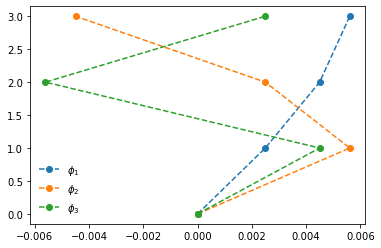

In [9]:
# find natural frequencies and mode shapes (https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html)
[evals,evecs]=eigh(K,M)
evecs[:,0]=-evecs[:,0]
evecs[:,2]=-evecs[:,2]
frequencies=np.sqrt(evals)/(2*np.pi) # Change to frequency
print('f1 = {0} Hz, f2 = {1} Hz, f3 = {2} Hz '.format(*tuple(frequencies.round(2).tolist())))
print('l1 = {0}, l2 = {1}, l3 = {2} '.format(*tuple(evecs.round(2).tolist())))

plt.ion()
plt.plot(np.concatenate([np.array([0]),evecs[:,0]]),np.array([0,1,2,3]),'--o',label=r'$\phi_1$')
plt.plot(np.concatenate([np.array([0]),evecs[:,1]]),np.array([0,1,2,3]),'--o',label=r'$\phi_2$')
plt.plot(np.concatenate([np.array([0]),evecs[:,2]]),np.array([0,1,2,3]),'--o',label=r'$\phi_3$')
plt.legend(frameon=False)
plt.ioff()

* Plot the eigen-modes of MDOF system and compare them to the _`COMSOL Multiphysics`_ ones (evaluated on at the midsurface of each floor)

_Hint_: Export `umx`, `umy` and `umz` from _`COMSOL Multiphysics`_ and import the files in the notebook.

Answer:

In [10]:
comsol_eigs = pd.read_csv("./comsol_results/with_rotation_eigen_modes_3D.csv", sep=",", header=None, comment='%')

umx=np.concatenate((np.zeros((1,10)),np.array(comsol_eigs.iloc[:,1:4]).T))

#print(np.real(comsol_eigs))

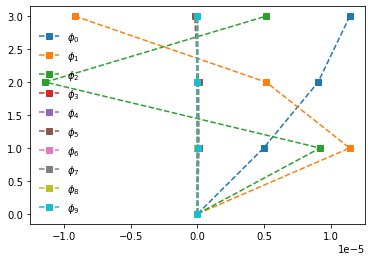

In [11]:
plt.ion()
for i in range(10):
    plt.plot(umx[:,i],np.array([0,1,2,3]),'--s',label=r'$\phi_{:>d}$'.format(i))

plt.legend(frameon=False)
plt.ioff()

* Compute the Participation Factors $\Gamma_{ij}$ and compare them to those from _`COMSOL Multiphysics`_ ((from Export Groups `Participation Factors (Eigenfrequencies)`).

In [12]:
# Analytical Compute modal Masses
mM = [evecs[:,i].conj().T @ M @ evecs[:,i] for i in range(3)]
print("Nodal mass 1: {:>.2f} kg".format(mM[0]))
print("Nodal mass 2: {:>.2f} kg".format(mM[1]))
print("Nodal mass 3: {:>.2f} kg".format(mM[2]))

# Analytical Participation Factors
Gamma_tilde = np.array([evecs[:,i].conj().T @ M/mM[i]  for i in range(3)])
print(Gamma_tilde)
print(Gamma_tilde.sum(axis=-1))

Nodal mass 1: 1.00 kg
Nodal mass 2: 1.00 kg
Nodal mass 3: 1.00 kg
[[ 43.07734213  77.62268835  96.79390915]
 [ 96.79390915  43.07734213 -77.62268835]
 [ 77.62268835 -96.79390915  43.07734213]]
[217.49393963  62.24856294  23.90612132]


In [13]:
comsol_Gamma = pd.read_csv("./comsol_results/with_rotation_participation_factors_3D.csv", sep=",", header=None, comment='%')
print(np.real(comsol_Gamma)[:,4:7].sum(axis=-1))

[ 2.21993336e+02  6.36105404e+01  2.44633392e+01  2.20509713e+02
  5.42294238e+01  1.90576713e+01  2.55942465e+01 -8.15532667e-02
  4.43631516e-03 -1.06799657e-01]


* Compute the _effective modal masses_ $m_{\text{eff},ij}$ and compare them with the _`COMSOL Multiphysics`_ ones

*Nota bene*: the `scipy` function `eigh` normalizes the eigenvector as:

$$              \boldsymbol{K} . \boldsymbol{\phi}_n = ω^2 \cdot \boldsymbol{M} . \boldsymbol{\phi}_n$$

The corresponding `python` code:

```
              K @ vi = λ * M @ vi
```
with:

$$\lambda = \omega_i^2$$


$$\boldsymbol{\phi}_n^T . \boldsymbol{K} . \boldsymbol{\phi}_n = \omega_n^2$$
$$\boldsymbol{\phi}_n^T . \boldsymbol{M} . \boldsymbol{\phi}_n = 1$$

In [14]:
mMeff = mM @ pow(Gamma_tilde,2)
print(mMeff)

[17250. 17250. 17250.]


In [15]:
comsol_masses = pd.read_csv("./comsol_results/with_rotation_participation_masses_3D.csv", sep=",", header=None,comment='%')
print(np.real(comsol_masses)[:,1:4].sum(axis=-1))

[4.90204135e+04 4.29540245e+03 6.09180743e+02 4.86245328e+04
 2.34083749e-01 6.35257628e-01 2.94083003e+03 3.63194812e+02
 6.55064122e+02 5.82845078e-02]


#### __[TASK #3] _`COMSOL Multiphysic`_  3D Response to Earthquake loading__ [4/20 points]

Consider the original 3D building (disable the kinematica constraints for Simple Shear Building).

* Solve the SDOF problem for each eigen-mode, in order to find the modal amplitudes $\alpha_n(t)$ (consider a critical damping $\xi$=2%). Construct the external force for the seismic load induced by $\boldsymbol{a}_{eq} = a_{eq}(t)\begin{bmatrix} 1\\ 1\\ 1\end{bmatrix} = a_{eq}(t)\sum_{i=1}^3 \boldsymbol{d}_i$ using the _`COMSOL Multiphysics`_ participation factors $\Gamma_{ij}$


_Nota Bene_:

The second order equation $y''(t)= a y'(t)+ b y(t) + c(t)$ can be rewritten as a system:

(1)   $y'(t) = z(t)$

(2)   $z'(t) = a z(t) + b y(t) + c(t)$

In this case, $a=0$ and $b=-\boldsymbol{M^{-1}.K}$.

The final first-order ordinary differential system of equations reads: 

$$\boldsymbol{X}'(t)=\boldsymbol{A.X(t)}+\boldsymbol{b}(t)$$

with $X(t)=\begin{bmatrix} \boldsymbol{q}(t)\\ \boldsymbol{q}'(t) \end{bmatrix}$ and $A=\begin{bmatrix} \boldsymbol{0} & \boldsymbol{I} \\  -\boldsymbol{M^{-1}.K} & \boldsymbol{0} \end{bmatrix}$ and with $\boldsymbol{b}(t)=\begin{bmatrix}0 \\ c(t)\end{bmatrix}$

In [16]:
# Hint: use the scipy function solve_ivp (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
from scipy.integrate import solve_ivp

# Initial conditions
y0 = np.zeros((1,))
z0 = np.zeros((1,))
X0 = np.concatenate([y0,z0])

def solve2ndOrderODE(t,X,n,xi):
    # with extra arguments args:
    # n = number of mode
    # xi = damping coefficient
    omega_n = 2*np.pi*comsol_Gamma3D[0][n] # n-th natural pulsation
    force_externe = (comsol_Gamma3D.iloc[n,4:7]).sum()
    fn = lambda s: -force_externe*aeq(s) # project external force on the n-th eigen mode
    return np.array([X[1],-2*omega_n*xi*X[1]-omega_n**2*X[0]+fn(t)]) # return [y(t),z(t)]

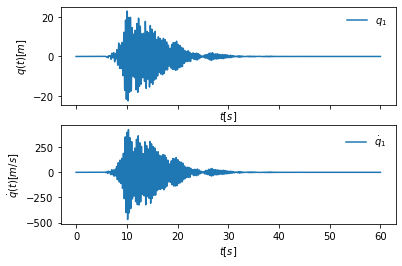

In [17]:
alpha1 = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(0,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha1.y[0,:])
axs[0].legend([r'$q_1$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')

axs[1].plot(alpha1.t,alpha1.y[1,:])
axs[1].legend([r'$\dot{q}_1$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')

plt.ioff()

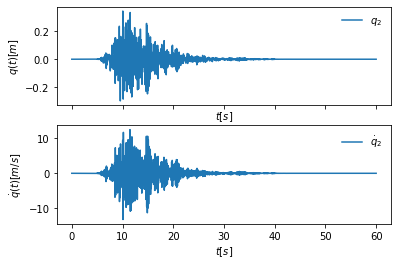

In [18]:
alpha2 = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(1,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha2.y[0,:])
axs[0].legend([r'$q_2$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')

axs[1].plot(alpha1.t,alpha2.y[1,:])
axs[1].legend([r'$\dot{q}_2$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')

plt.ioff()

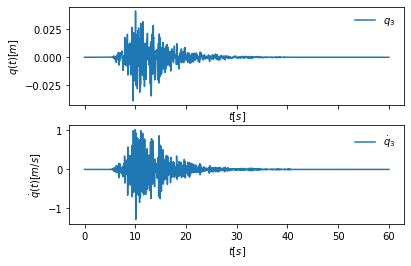

In [19]:
alpha3 = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(2,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha3.y[0,:])
axs[0].legend([r'$q_3$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')

axs[1].plot(alpha1.t,alpha3.y[1,:])
axs[1].legend([r'$\dot{q}_3$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')

plt.ioff()

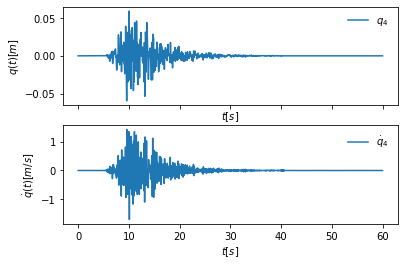

In [20]:
alpha4 = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(3,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha4.y[0,:])
axs[0].legend([r'$q_4$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')

axs[1].plot(alpha1.t,alpha4.y[1,:])
axs[1].legend([r'$\dot{q}_4$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')

plt.ioff()

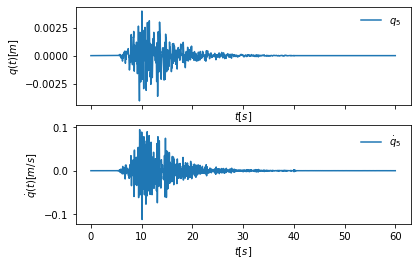

In [21]:
alpha5 = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(4,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha5.y[0,:])
axs[0].legend([r'$q_5$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')

axs[1].plot(alpha1.t,alpha5.y[1,:])
axs[1].legend([r'$\dot{q}_5$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')

plt.ioff()

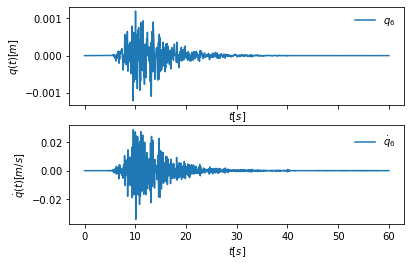

In [22]:
alpha6 = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(5,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha6.y[0,:])
axs[0].legend([r'$q_6$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')

axs[1].plot(alpha1.t,alpha6.y[1,:])
axs[1].legend([r'$\dot{q}_6$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')

plt.ioff()

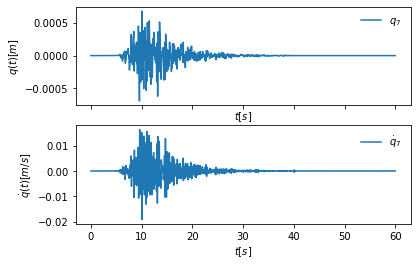

In [23]:
alpha7 = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(6,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha7.y[0,:])
axs[0].legend([r'$q_7$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')

axs[1].plot(alpha1.t,alpha7.y[1,:])
axs[1].legend([r'$\dot{q}_7$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')

plt.ioff()

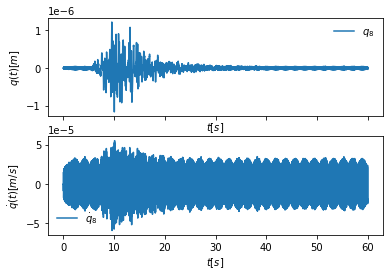

In [24]:
alpha8 = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(7,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha8.y[0,:])
axs[0].legend([r'$q_8$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')

axs[1].plot(alpha1.t,alpha8.y[1,:])
axs[1].legend([r'$\dot{q}_8$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')

plt.ioff()

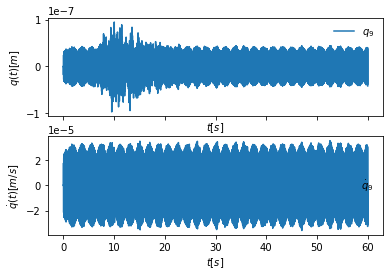

In [25]:
alpha9 = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(8,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha9.y[0,:])
axs[0].legend([r'$q_9$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')

axs[1].plot(alpha1.t,alpha9.y[1,:])
axs[1].legend([r'$\dot{q}_9$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')

plt.ioff()

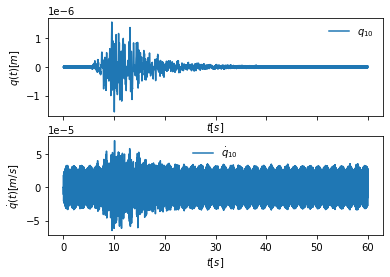

In [26]:
alpha10 = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(9,0.02))

plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(alpha1.t,alpha10.y[0,:])
axs[0].legend([r'$q_{10}$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$q(t) [m]$')

axs[1].plot(alpha1.t,alpha10.y[1,:])
axs[1].legend([r'$\dot{q}_{10}$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{q}(t) [m/s]$')

plt.ioff()

* Compute the total response based on the $\alpha_n(t)$ ahd $\boldsymbol{\phi}_n$ values

Answer:

In [27]:
# Modal amplitudes (displacement)
Alpha = np.array([alpha1.y[0,:],alpha2.y[0,:],alpha3.y[0,:],
                  alpha4.y[0,:],alpha5.y[0,:],alpha6.y[0,:],
                  alpha7.y[0,:],alpha8.y[0,:],alpha9.y[0,:],
                 alpha10.y[0,:]])


# Displacement
u = Alpha.T@umx[1:4,:].T
u=u.T


# Modal amplitudes (velocity)
AlphaDot = np.array([alpha1.y[1,:],alpha2.y[1,:],alpha3.y[1,:],
                     alpha4.y[1,:],alpha5.y[1,:],alpha6.y[1,:],
                     alpha7.y[1,:],alpha8.y[1,:],alpha9.y[1,:],
                    alpha10.y[1,:]])


# Velocity
v = AlphaDot.T@umx[1:4,:].T
v=v.T

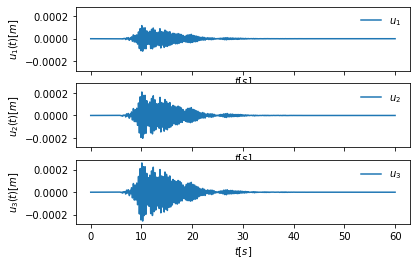

In [28]:
plt.ion()

fig,axs = plt.subplots(3,1,sharex=True,sharey=True)
axs[0].plot(alpha1.t,u[0,:])
axs[0].legend([r'$u_1$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$u_1(t) [m]$')

axs[1].plot(alpha2.t,u[1,:])
axs[1].legend([r'$u_2$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$u_2(t) [m]$')

axs[2].plot(alpha3.t,u[2,:])
axs[2].legend([r'$u_3$',],frameon=False)
axs[2].set_xlabel(r'$t [s]$')
axs[2].set_ylabel(r'$u_3(t) [m]$')

plt.ioff()

np.savetxt('q1.csv',np.hstack([vtm.reshape(-1,1),u[0,:].reshape(-1,1)]),delimiter = ',', fmt='%15.5f')
np.savetxt('q2.csv',np.hstack([vtm.reshape(-1,1),u[1,:].reshape(-1,1)]),delimiter = ',', fmt='%15.5f')
np.savetxt('q3.csv',np.hstack([vtm.reshape(-1,1),u[2,:].reshape(-1,1)]),delimiter = ',', fmt='%15.5f')

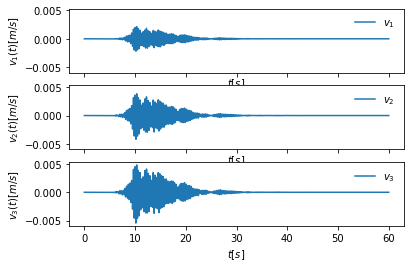

In [29]:
plt.ion()

fig,axs = plt.subplots(3,1,sharex=True,sharey=True)
axs[0].plot(alpha1.t,v[0,:])
axs[0].legend([r'$v_1$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$v_1(t) [m/s]$')

axs[1].plot(alpha2.t,v[1,:])
axs[1].legend([r'$v_2$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$v_2(t) [m/s]$')

axs[2].plot(alpha3.t,v[2,:])
axs[2].legend([r'$v_3$',],frameon=False)
axs[2].set_xlabel(r'$t [s]$')
axs[2].set_ylabel(r'$v_3(t) [m/s]$')

plt.ioff()

* Compute and plot the _response spectrum_ for each modal amplitude $\alpha_i$:

$$S_d(\alpha_i)=\max_{t}\vert \alpha_i(t)\vert$$

and plot the values as a function of the associated natural frequency.

Answer:

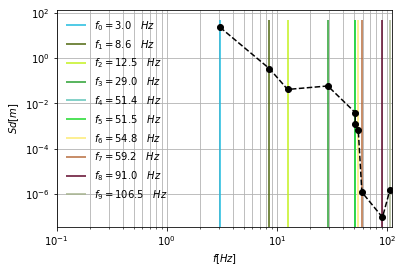

In [30]:
Sd = [max(alpha1.y[0]),max(alpha2.y[0]),max(alpha3.y[0]),max(alpha4.y[0]),max(alpha5.y[0]),max(alpha6.y[0]),max(alpha7.y[0]),max(alpha8.y[0]),max(alpha9.y[0]),max(alpha10.y[0])]
comsol_eigs3D=pd.read_csv("./comsol_results/with_rotation_participation_masses_3D.csv", sep=",", header=None,comment='%')
plt.ion()
col = np.random.rand(20,3)
# tick_params(which='both', width=2)
for i in range(10):
    plt.vlines(np.real(comsol_eigs3D.iloc[i,0]),0.0,50.0,label=r'$f_{{{:>d}}} = {:>.1f}\quadHz$'.format(i,np.real(comsol_eigs3D.iloc[i,0])),
              color=col[2*i:2*i+1,:])

plt.plot(np.real(comsol_eigs3D.iloc[:,0].values),Sd,'--o',color='black')
plt.xlabel(r'$f [Hz]$')
plt.ylabel(r'$Sd [m]$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,110)
plt.grid(True, which='both')
plt.legend(frameon=False)
plt.ioff()

Which mode dominates the transient response?

Answer:

The three translation modes 0,1,2

#### __[TASK #4] Compute transfer function__  [4/20 points]

For each mode, the transfer function $\hat{H}_n(\omega)$ reads:

$$\hat{\boldsymbol{H}}(\omega)=\sum_n H_n(\omega)\boldsymbol{\phi}_n\otimes\boldsymbol{\phi}_n$$

* Compute the transfer function of the whole MDOF (consider a critical damping $\xi$=2%)

Answer: 

In [54]:
def computeTF(sol,n,xi):
    
    omega_n = 2*np.pi*comsol_Gamma3D[0][n] # n-th natural pulsation
    force_externe = (comsol_Gamma3D.iloc[n,4:7]).sum()
    fn = lambda s: -force_externe*aeq(s) # project external force on the n-th eigen mode
    fn = np.vectorize(fn)
    
    nfft = next_power_of_2(vtm.size)
    dfq = 1/(dt*nfft)# Number of samples
    vfq = np.arange(nfft/2+1)*dfq# List of frequency

    # Fourier Transform of input signal and output signal
    Inp = np.fft.rfft([fn(t) for t in vtm],nfft)
    Out = np.fft.rfft(sol.y[0],nfft)
    H=Out/(Inp+1e-10)
    nfft = next_power_of_2(vtm.size)
    
   
    
    return vfq,Out/(Inp+1.0e-4)

vfq,H1 = computeTF(alpha1,0,0.02)
_,H2 = computeTF(alpha2,1,0.02)
_,H3 = computeTF(alpha3,2,0.02)
_,H4 = computeTF(alpha1,3,0.02)
_,H5 = computeTF(alpha2,4,0.02)
_,H6 = computeTF(alpha3,5,0.02)
_,H7 = computeTF(alpha1,6,0.02)
_,H8 = computeTF(alpha2,7,0.02)
_,H9 = computeTF(alpha3,8,0.02)
_,H10 = computeTF(alpha1,9,0.02)

# eigen vectors
evecs = umx[1:4,:]
# norm of eigen vectors
normevecs = np.linalg.inv(np.diag(np.linalg.norm(evecs,axis=0)))

# Transfer function H
H = np.einsum('ik,jk,kl->ijl',evecs,[H1,H2,H3,H4,H5,H6,H7,H8,H9,H10])

# Fourier's spectrum H1*phi1+H2*phi2+H3*phi3
U = np.einsum('jk,kl->jl',evecs,[H1,H2,H3,H4,H5,H6,H7,H8,H9,H10])

ValueError: more operands provided to einstein sum function than specified in the subscripts string

* Plot the response `U` and the eigen frequencies previously identified. What do you observe?

Answer:

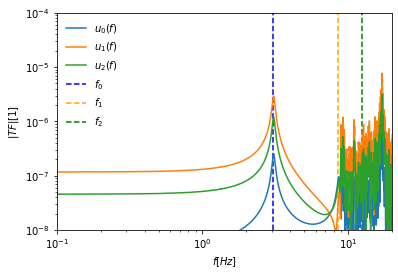

In [32]:
plt.ion
plt.loglog(vfq,np.abs(U.T))
plt.vlines(np.real(comsol_eigs3D.iloc[0,0]),1e-8,1e-4,color='blue',linestyle='--')
plt.vlines(np.real(comsol_eigs3D.iloc[1,0]),1e-8,1e-4,color='orange',linestyle='--')
plt.vlines(np.real(comsol_eigs3D.iloc[2,0]),1e-8,1e-4,color='green',linestyle='--')
plt.xlabel(r'$f [Hz]$')
plt.xlim([0.1,20])
plt.ylim([1e-8,1e-4])
plt.ylabel(r'$\vert TF\vert [1]$')
plt.legend([r'$u_{{{:d}}}(f)$'.format(m) for m in range(3)]+[r'$f_{{{:d}}}$'.format(m) for m in range(3)],frameon=False,loc='upper left')
plt.ioff()

Explanation: the peaks correspond to the eigen frequencies. Amplitudes are different. The first mode is dominant

#### __[TASK #5] Response to a random load (wind)__  [7/20 points]

We study the main characteristics of the wind loading. The horizontal velocity of the wind is modeled here in the following way:

$$V(t) = \mu_V+\beta(t)$$

where $\beta(t)$ is a centered gaussian random process, with a given Power Spectral Density $S_V(f)$ (with $f$ being the frequency, in Hz), and $\mu_V$ = 100 km/h. The velocity field is therefore random and $S_V(f)$ reads:

$$ S_V(f) = \frac{4\kappa\cdot \mu_V\cdot L}{\left(2+\left(\frac{L\cdot f}{\mu_V} \right)^2\right)^{\frac{5}{6}} }$$

with $\kappa$ and $L$ two constants.

* Plot the spectrum $S_V(f)$ as a function of $f$ (both phase and amplitude!). What are the mathematical properties of this Power Spectral Density?

_Nota Bene_: use the frequency vector employed in the previous steps, considering the time vector `vtm` as time domain of reference.

Answer:

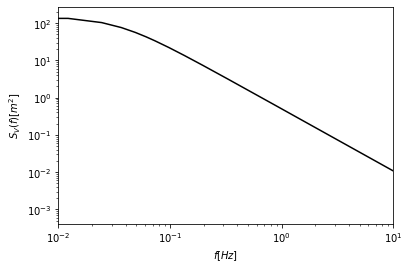

In [33]:
muV = 1.0e5/3600.0 # mean velocity at 10m height: 100 km/h
kappa = 0.002 # constant
Lcar = 1200.0 # constant

nfft = next_power_of_2(vtm.size)
dfq = 1/(dt*nfft)# Number of samples
vfq = np.arange(nfft/2+1)*dfq# List of frequency

Sv = lambda f: 4*kappa*muV*Lcar/pow(2+pow(Lcar*f/muV,2),5/6)

plt.ion()
plt.loglog(vfq,Sv(vfq),color='black')
plt.xlim(0.01,10.0)
plt.xlabel(r'$f [Hz]$')
plt.ylabel(r'$S_V(f) [m^2]$')
plt.ioff()

In order to generate a plausible realization of the wind velocity field $\beta_j(t)$, the following formula is adopted:

$$ \beta_j(t) = 2\cdot\sqrt{\frac{2}{\pi}}\cdot \sum_{k=1}^{N_f} \sqrt{2\cdot\pi\cdot S_V(f_k)\cdot \Delta f }\cdot \rho_{jk} \cdot\cos\left( 2\pi f_k t -2\pi\phi_{jk}\right)$$

with:
 - $\Delta f$ : frequency step
 - $N_f$: number of frequency points 
 - $\rho_{jk}=\vert a_{jk}+i\cdot b_{jk} \vert$: $j^{\text{th}}$-realization of the random vector $\boldsymbol{\rho}$ with $a_{jk}\sim\mathcal{N}(0,1)$ and $b_{jk}\sim\mathcal{N}(0,1)$
 - $\phi_{jk}$: $j^{\text{th}}$-realization of the random vector $\boldsymbol{\phi}$ with $\phi_{jk}\sim\mathcal{U}(0,1)$

* Generate $N_s$ samples of wind velocity field

Answer:

In [34]:
# Hint: Use the numpy random number generator https://numpy.org/doc/stable/reference/random/index.html
from numpy.random import default_rng
rng = default_rng()

Ns = 10 # number of wind samples

beta_realizations=np.empty(shape=(0,len(vtm)),dtype=float)
for i in range(Ns):
    somme = np.zeros((len(vtm),),dtype=float)
    for k in range(1,(int)(nfft/2+1)):
        rho=abs(complex(np.random.default_rng().normal(0, 1, 1), np.random.default_rng().normal(0, 1, 1)))
        phi=np.random.default_rng().uniform(0, 1, 1)
        somme = np.sqrt(2*np.pi*Sv(vfq[k])*dfq)*rho*np.cos(2*np.pi*vfq[k]*vtm-2*np.pi*phi)+somme
    betaj=2*np.sqrt(2/np.pi)*somme
    beta_realizations=np.append(beta_realizations,[betaj],axis=0)
    
Ebeta = np.mean(beta_realizations,0)

* Plot the $N_s$ realizations on a single graph

Answer:

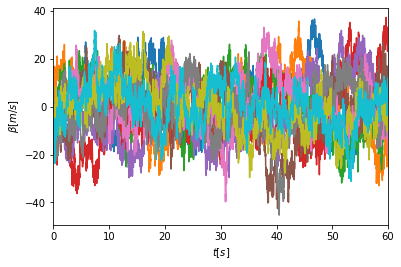

In [35]:
plt.ion()
plt.plot(vtm,beta_realizations.T)
plt.xlim(0.0,dur)
plt.xlabel(r'$t [s]$')
plt.ylabel(r'$\beta [m/s]$')
plt.ioff()

* Compute the Fourier's transform of each realization and plot them on a single graph

Answer:

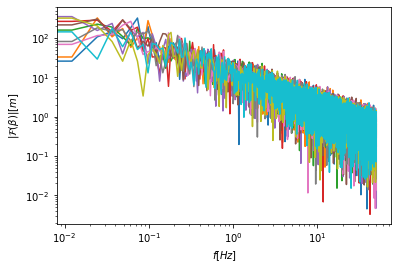

In [36]:
beta_fs = np.fft.rfft(beta_realizations,nfft,axis=-1)*dt # real fft


plt.ion()
plt.loglog(vfq,np.abs(beta_fs.T))
plt.xlabel(r'$f [Hz]$')
plt.ylabel(r'$\vert\mathcal{F}(\beta)\vert [m]$')
plt.ioff()

* Compute the approximated and the theoretical Power Spectral Density for the velocity field $V(t)$

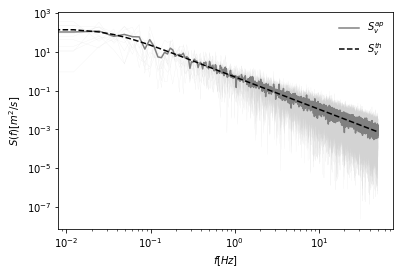

In [37]:
# velocity realizations
v_realizations = beta_realizations+muV
# empirical velocity average
Ev = np.mean(v_realizations,0)
v_fs = np.fft.rfft(v_realizations-Ev,nfft,axis=-1)*dt # real fft
Sv_a = pow(abs(v_fs),2)/dur/2/np.pi # approximated PSD

plt.ion()
plt.loglog(vfq,Sv_a.T,color='lightgrey',linewidth=0.1)
plt.loglog(vfq,np.mean(Sv_a,0),label=r'$S_v^{ap}$',color='grey')
plt.loglog(vfq,Sv(vfq),label=r'$S_v^{th}$',color='black',linestyle='--')
plt.legend(frameon=False)
plt.xlabel(r'$f [Hz]$')
plt.ylabel(r'$S(f) [m^2/s]$')
plt.ioff()

The pressure $p$ applied by the wind on a given surface can be related to the square of the velocity through the formula:

$$ p(t)=\frac{1}{2}\rho_aC_D V^2(t)$$

with $\rho_a$=1.2 kg/m$^3$ being the unit mass density of the air and $C_D$ the drag coefficient.

In [38]:
rho_a = 1.2 # kg/m**3
Cd = 0.8

However, in practice a linearized formula for the pressure field is adopted hereafter.

* Compute the linearized expression of the pressure field, considering small fluctuations $\beta(t)\ll 1$

Answer:

$$p(t)=\frac{1}{2}\rho_a C_D\mu_V^2\left(1+2\frac{\beta(t)}{\mu_V}\right)$$

* Compute several samples of the pressure field for $z$=1 m, evaluate its power spectrum $S_p(f)$ and compare them with the theoretical spectrum:

$$S_p(f)=4\left(\frac{\mu_p}{\mu_V}\right)^2 S_V(f)$$

where $\mu_p$ is the mean pressure.

Answer:

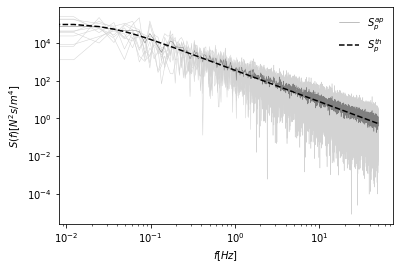

In [39]:
# Mean pressure field
mup = 1/2*rho_a*Cd*muV**2

# theoretical PSD
Sp_t = lambda f: 4*(mup/muV)**2*Sv(f)

# pressure field
p_realizations = 1/2*rho_a*Cd*pow(v_realizations,2)
# empirical pressure average
Ep = np.mean(p_realizations,0)
p_fs = np.fft.rfft(p_realizations-Ep,nfft,axis=-1)*dt # real fft
Sp_a = pow(abs(p_fs),2)/dur/2/np.pi #  approximated PSD


plt.ion()
plt.loglog(vfq,Sp_a.T,color='lightgrey',linewidth=0.5)
plt.loglog(vfq,np.mean(Sp_a,0),label=r'$S_p^{ap}$',color='grey',linewidth=0.5)
plt.loglog(vfq,Sp_t(vfq),label=r'$S_p^{th}$',color='black',linestyle='--')
plt.legend(frameon=False)
plt.xlabel(r'$f [Hz]$')
plt.ylabel(r'$S(f) [N^2s/m^4]$')
plt.ioff()

Adopting the _`COMSOL Multiphyiscs`_ 3D building, consider the same pressure field $p(t)$ on each translational dof, using the previously computed _participation factors_ and with a lateral surface (where the wind is applied) equal to $S$=4 m$^2$

* Compute the amplitudes $\alpha_n$ for for all the $N_S$ random wind load realizations 

_Nota bene_: use `solve2ndOrderODE`!

Answer:

In [42]:
# Initial conditions
y0 = np.zeros((1,))
z0 = np.zeros((1,))
X0 = np.concatenate([y0,z0])
S= 4.0 # lateral surface area [m**2]

def solve2ndOrderODE(t,X,n,xi,i):
    # with extra arguments args:
    # n = number of mode
    # xi = damping coefficient
    omega_n = 2*np.pi*comsol_Gamma3D[0][n] # n-th natural pulsation
    force_externe = (comsol_Gamma3D.iloc[n,4:7]).sum()
    pwind = lambda s: np.interp(s,vtm,p_realizations[r,:])
    fn = lambda s: -force_externe*pwind(s)*S # project external force on the n-th eigen mode
    
    return np.array([X[1],-2*omega_n*xi*X[1]-omega_n**2*X[0]+fn(t)])

AlphaRndm = np.empty((Ns,3,ntm))
AlphaDotRndm = np.empty((Ns,3,ntm))
uRndm = np.empty((Ns,3,ntm))
vRndm = np.empty((Ns,3,ntm))

# important modes : 0, 3, 5 (translational in x direction)
for r in range(Ns):
    alpha1Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(0,0.02,r))
    alpha2Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(1,0.02,r))
    alpha3Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(2,0.02,r))
 #   alpha4Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(3,0.02,r))
#     alpha5Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(4,0.02,r))
#    alpha6Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(5,0.02,r))
#     alpha7Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(6,0.02,r))
#     alpha8Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(7,0.02,r))
#     alpha9Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(8,0.02,r))
#     alpha10Rndm = solve_ivp(solve2ndOrderODE, (0.0, dur), X0, t_eval=vtm, args=(9,0.02,r))
    
    # Modal amplitudes (displacement)
    AlphaRndm[r,:,:] = np.vstack([alpha1Rndm.y[0,:],alpha2Rndm.y[0,:],alpha3Rndm.y[0,:]])

    # Displacement
    uRndm[r,:,:] = np.einsum('i,j->ij',evecs[:,0],alpha1Rndm.y[0,:])+np.einsum('i,j->ij',evecs[:,1],alpha2Rndm.y[0,:])+np.einsum('i,j->ij',evecs[:,2],alpha3Rndm.y[0,:])
    
    # Modal amplitudes (velocity)
    AlphaDotRndm[r,:,:] = np.vstack([alpha1Rndm.y[1,:],alpha2Rndm.y[1,:],alpha3Rndm.y[1,:]])

    # Velocity
    vRndm[r,:,:] =  np.einsum('i,j->ij',evecs[:,0],alpha1Rndm.y[1,:])+np.einsum('i,j->ij',evecs[:,1],alpha2Rndm.y[1,:])+np.einsum('i,j->ij',evecs[:,2],alpha3Rndm.y[1,:])

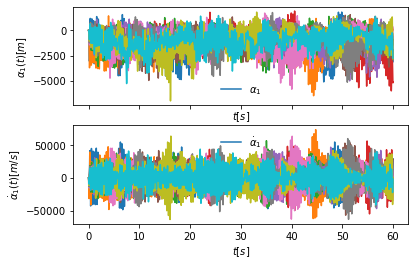

In [47]:
plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(vtm,AlphaRndm[:,0,:].squeeze().T)
axs[0].legend([r'$\alpha_1$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$\alpha_1(t) [m]$')
#axs[0].set_ylim(-0.05,0.05)

axs[1].plot(vtm,AlphaDotRndm[:,0,:].squeeze().T)
axs[1].legend([r'$\dot{\alpha}_1$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{\alpha}_1(t) [m/s]$')
# axs[1].set_ylim(-5500.0,5500.0)

plt.ioff()

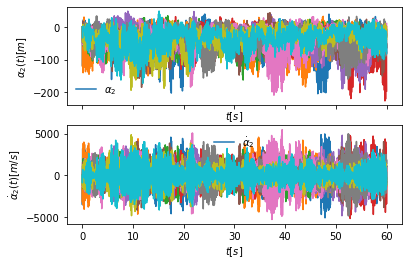

In [45]:
plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(vtm,AlphaRndm[:,1,:].squeeze().T)
axs[0].legend([r'$\alpha_2$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$\alpha_2(t) [m]$')
# axs[0].set_ylim(-600.0,600.0)

axs[1].plot(vtm,AlphaDotRndm[:,1,:].squeeze().T)
axs[1].legend([r'$\dot{\alpha}_2$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{\alpha}_2(t) [m/s]$')
# axs[1].set_ylim(-5500.0,5500.0)

plt.ioff()

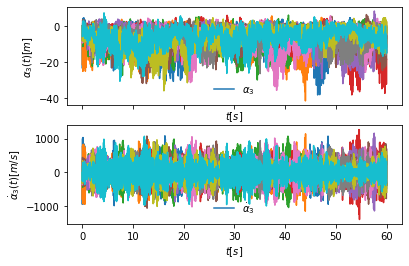

In [46]:
plt.ion()

fig,axs = plt.subplots(2,1,sharex=True)
axs[0].plot(vtm,AlphaRndm[:,2,:].squeeze().T)
axs[0].legend([r'$\alpha_3$',],frameon=False)
axs[0].set_xlabel(r'$t [s]$')
axs[0].set_ylabel(r'$\alpha_3(t) [m]$')
# axs[0].set_ylim(-600.0,600.0)

axs[1].plot(vtm,AlphaDotRndm[:,2,:].squeeze().T)
axs[1].legend([r'$\dot{\alpha}_3$',],frameon=False)
axs[1].set_xlabel(r'$t [s]$')
axs[1].set_ylabel(r'$\dot{\alpha}_3(t) [m/s]$')
# axs[1].set_ylim(-5500.0,5500.0)

plt.ioff()

* Plot the average Power Spectral Density $\boldsymbol{S}_u$ for the each dof and the theoretical one (use the theoretical $FRF$ computed above!)

Answer:

In [48]:
Hvector = Hf*np.array([1.0,2.0,3.0])

frndm = lambda realization, time:  np.interp(time,vtm,p_realizations[realization,:])

# External force
FextRndm = lambda realization, time: [h*Lx*frndm(realization, time) for h in Hvector]

#External force realizations
Fext_realizations = np.empty((Ns,3,ntm))
for r in range(Ns):
    Fext_realizations[r,:,:] = FextRndm(r,vtm)

# Empirical external force average
Ef = np.array([np.mean(Fext_realizations[:,0,:]),np.mean(Fext_realizations[:,1,:]),np.mean(Fext_realizations[:,2,:]),])
Ef = np.tile(np.tile(Ef,(Ns,1)).reshape(Ns,3,1),ntm)
Fext_fs = np.fft.rfft(Fext_realizations-Ef,nfft,axis=-1)*dt # real fft

def compute_Sf(fq,Fext_fs):
    fq_idx = np.argwhere(np.isin(vfq,fq))

    Sf = np.empty((3,3,fq.size,Ns),dtype=np.complex64)
    for k in range(Ns):
        for i in fq_idx:
            fki = Fext_fs[k,:,i].squeeze()
            fkic = np.conjugate(Fext_fs[k,:,i]).squeeze()
            Sf[:,:,i,k] = fki@fkic/dur/2/np.pi
    return np.real(np.mean(Sf,axis=-1))

# approximated PSD
Sf_a = compute_Sf(vfq,Fext_fs)/dur/2/np.pi

# theoretical PSD
Sf_t = lambda f: 4*np.einsum('i,j,k',Hvector,Hvector,Sv(f))

In [71]:
print(H[:,:,10]@HcT[:,:,10]@Sf_a[:,:,10])

[[1.42411325e-20-1.23580562e-26j 1.42411325e-20-1.23580562e-26j
  1.42411325e-20-1.23580562e-26j]
 [2.56474192e-20-1.45220993e-26j 2.56474192e-20-1.45220993e-26j
  2.56474192e-20-1.45220993e-26j]
 [3.23138153e-20+2.68801555e-26j 3.23138153e-20+2.68801555e-26j
  3.23138153e-20+2.68801555e-26j]]


In [70]:
# Conjugate transpose Transfer function
HcT = np.transpose(np.conjugate(H),(1,0,2))

def compute_Su(fq,Sf):
    fq_idx = np.argwhere(np.isin(vfq,fq))

    Su = np.empty((3,3,fq.size),dtype=np.complex64)
    for i in fq_idx:
        Su[:,:,i] = H[:,:,i]@ HcT[:,:,i]@ Sf[:,:,i]
    return np.real(Su)

Su_a = compute_Su(vfq,Sf_a)
Su_t = compute_Su(vfq,Sf_t(vfq))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

NameError: name 'Su_a' is not defined

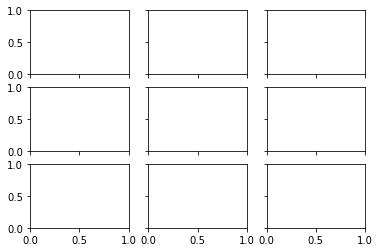

In [64]:
plt.ion()
fig,axs = plt.subplots(3,3,sharex=True,sharey=True)
axs[0,0].loglog(vfq,Su_a[0,0,:],label=r'$S_{u1-u1}^{ap}$')
axs[0,1].loglog(vfq,Su_a[0,1,:],label=r'$S_{u1-u2}^{ap}$')
axs[0,2].loglog(vfq,Su_a[0,2,:],label=r'$S_{u1-u3}^{ap}$')
axs[1,0].loglog(vfq,Su_a[1,0,:],label=r'$S_{u2-u1}^{ap}$')
axs[1,1].loglog(vfq,Su_a[1,1,:],label=r'$S_{u2-u2}^{ap}$')
axs[1,2].loglog(vfq,Su_a[1,2,:],label=r'$S_{u2-u3}^{ap}$')
axs[2,0].loglog(vfq,Su_a[2,0,:],label=r'$S_{u3-u1}^{ap}$')
axs[2,1].loglog(vfq,Su_a[2,1,:],label=r'$S_{u3-u2}^{ap}$')
axs[2,2].loglog(vfq,Su_a[2,2,:],label=r'$S_{u3-u3}^{ap}$')

axs[0,0].loglog(vfq,Su_t[0,0,:],label=r'$S_{u1-u1}^{th}$')
axs[0,1].loglog(vfq,Su_t[0,1,:],label=r'$S_{u1-u2}^{th}$')
axs[0,2].loglog(vfq,Su_t[0,2,:],label=r'$S_{u1-u3}^{th}$')
axs[1,0].loglog(vfq,Su_t[1,0,:],label=r'$S_{u2-u1}^{th}$')
axs[1,1].loglog(vfq,Su_t[1,1,:],label=r'$S_{u2-u2}^{th}$')
axs[1,2].loglog(vfq,Su_t[1,2,:],label=r'$S_{u2-u3}^{th}$')
axs[2,0].loglog(vfq,Su_t[2,0,:],label=r'$S_{u3-u1}^{th}$')
axs[2,1].loglog(vfq,Su_t[2,1,:],label=r'$S_{u3-u2}^{th}$')
axs[2,2].loglog(vfq,Su_t[2,2,:],label=r'$S_{u3-u3}^{th}$')

for ax in axs.reshape(-1):
    ax.legend(frameon=False)
    ax.set_xlabel(r'$f [Hz]$')
    ax.set_ylabel(r'$S(f) [N^2s]$')


plt.ioff()